# Safe Attack Positions
5 Enemies and 1 Player are randomly spawned in the map.  
The Line of Sight of each player is approximated to a rectangular region, whose edges are determined by traversing straight in the 4 directions till reaching a wall. The nodes visible to each player is stored in a 2-D list.  
A particular enemy A is chosen by the user.  
For the player, the nodes visible to all other enemies are $V=\cup_{i=0}^nV_i, i\neq A$, where $V_i$ are the LOS of the each enemy player.  
The safe attack positions are $S_A=V_A \cap V'$

## Imports

In [1]:
import sys, random
sys.path.append("../")
from Core.maze import Maze, INF

## Functions

In [2]:
def checkExists(maxe, x, y):
    '''
    Given a point in a maze, check if it exists.
    It exists if all of the neighbors are not INF.
    '''
    if x in range(0,maze.num_columns) and y in range(0,maze.num_rows):
        if 0 in maze.grid[y][x].neighbors.values():
            return 1
    return 0

In [3]:
def randomPlayers(maze):
    '''
    Spawns 5 enemy and 1 player in random locations in the map
    '''
    players = set()
    while len(players)!=6:
        x=random.randrange(0,maze.num_columns, 1)
        y=random.randrange(0,maze.num_rows, 1)
        if checkExists(maze,x,y):
            players.add((y,x))
    return list(players)

In [4]:
def initLOS(maze, players):
    '''
    Initializes the Line of Sight of each player
    '''
    playerLOS=[]
    neighbors = [(-1,0,"N"),(1,0,"S"),(0,-1,"W"),(0,1,"E")]
    for player in players:
        y=player[0]
        x=player[1]
        limits=[]
        # Traverse 4 directions till wall, hence finding rectangular LOS
        for a,b,c in neighbors:
            for i in range(0,max(maze.num_rows, maze.num_columns)):
                if maze.grid[y+a*i][x+b*i].neighbors[c]==INF:
                    limits.append(i)
                    break
        los=[]
        for i in range(y-limits[0],y+limits[1]+1):
            for j in range(x-limits[2],x+limits[3]+1):
                los.append((i,j))
        playerLOS.append(los)
    return playerLOS

In [5]:
## Safe Attack Positions

In [6]:
def safeAttack(maze, players, choice):
    playerLOS=initLOS(maze, players)
    danger = set()
    for i in range(len(playerLOS)-1):
        if i == choice:
            continue
        if len(danger) == 0:
            danger = set(playerLOS[i])
        else:
            danger = danger.union(set(playerLOS[i]))
    safe = set()
    for y in range(0,maze.num_rows):
        for x in range(0, maze.num_columns):
            if checkExists(maze, x, y) and (y,x) not in danger:
                safe.add((y,x))
    safe = safe.intersection(set(playerLOS[choice]))
    maze.add_colors(path=safe, color=(0,255,0))
    for i in range(0,5):
        maze.add_colors(path=[players[i]], color=(255-50*i,0,0))
    maze.add_colors(path=[players[-1]], color=(0,0,255))

In [7]:
def main(maze):
    players=randomPlayers(maze)
    for i in range(0,5):
        maze.add_colors(path=[players[i]], color=(255-50*i,0,0))
    maze.add_colors(path=[players[-1]], color=(0,0,255))
    display(maze.draw(cell_width=6))

    choice = int(input("Choose player to attack[1-5](1-Brightest Red ... 5 - Darkest Red):"))
    print("Safe Attack Position Against Player-"+str(choice)+":")
    safeAttack(maze, players, choice-1)
    display(maze.draw(cell_width=6))

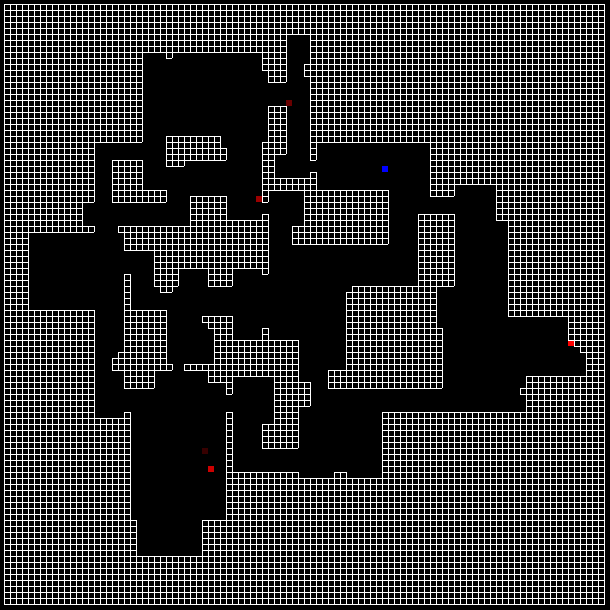

Safe Attack Position Against Player-1:


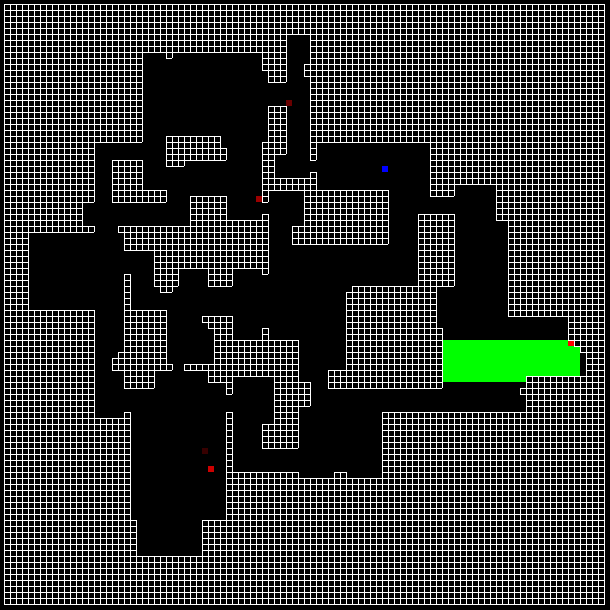

In [8]:
maze = Maze()
maze.load_from_image("Valorant_Ascent.jpg", 100)
main(maze)

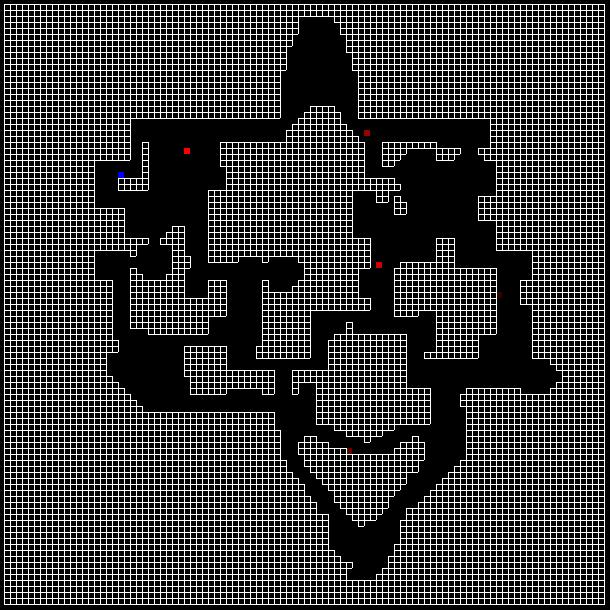

Safe Attack Position Against Player-2:


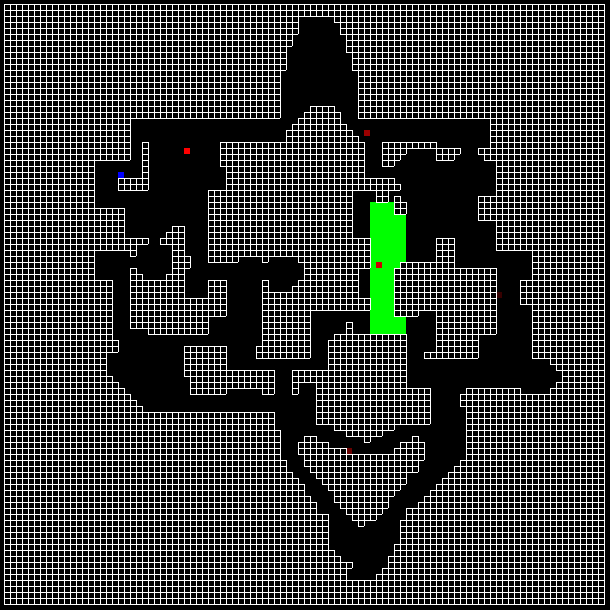

In [9]:
maze = Maze()
maze.load_from_image("Valorant_Bind.jpg", 100)
main(maze)

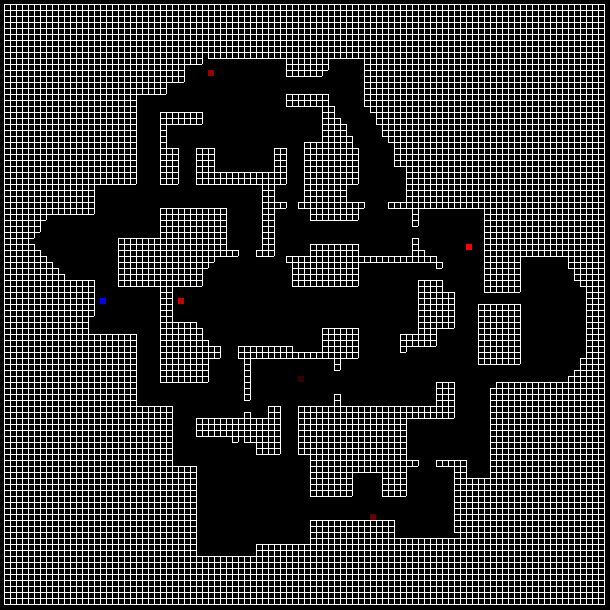

Safe Attack Position Against Player-3:


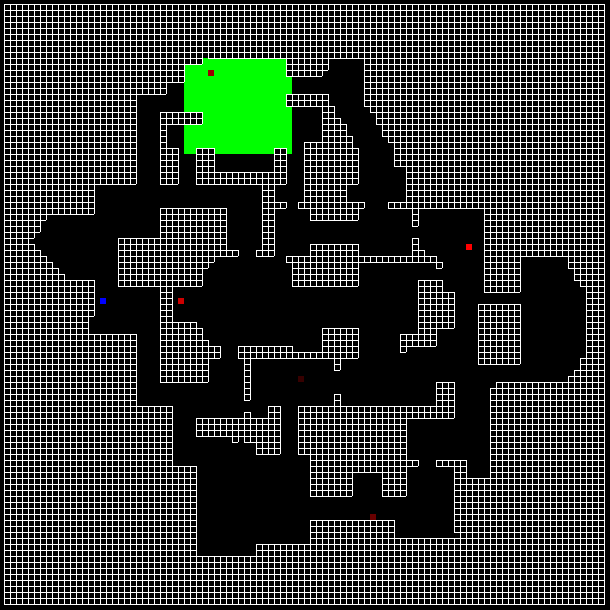

In [10]:
maze = Maze()
maze.load_from_image("Valorant_Haven.jpg", 100)
main(maze)

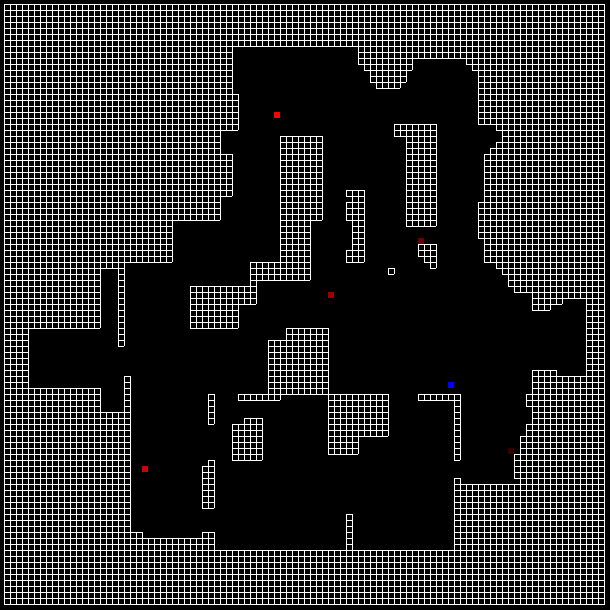

Safe Attack Position Against Player-4:


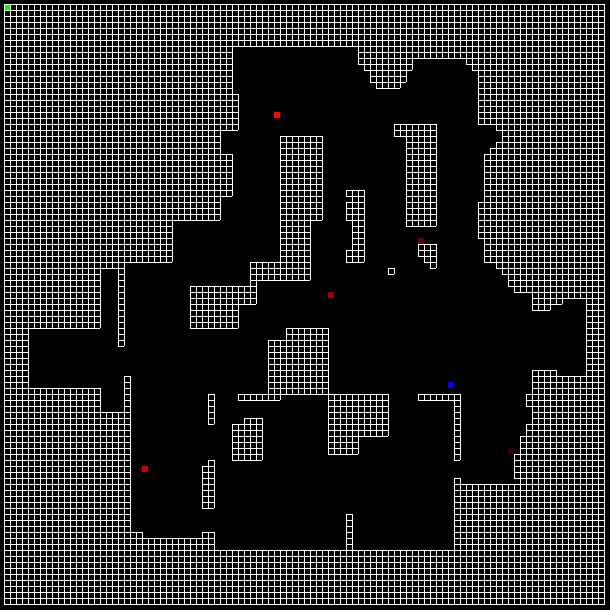

In [11]:
maze = Maze()
maze.load_from_image("Valorant_Icebox.jpg", 100)
main(maze)

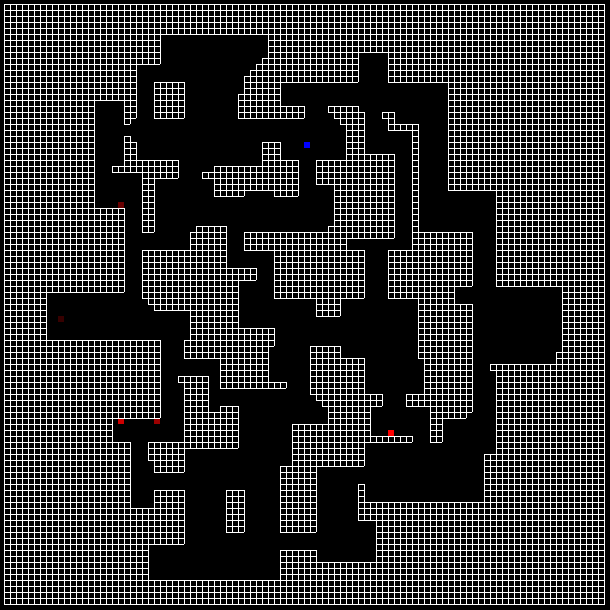

Safe Attack Position Against Player-5:


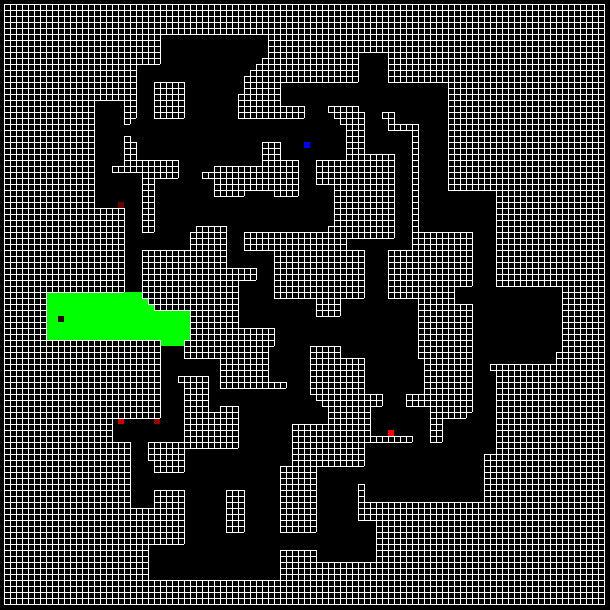

In [12]:
maze = Maze()
maze.load_from_image("Valorant_Split.jpg", 100)
main(maze)